# Project 2:  Holiday weather

By Onyemma Mirian, updated 25th February, 2020

This is the project notebook for the second part of The Open University's _Learn to code for Data Analysis_ course.

In this project I'm going to use the historic weather data from the Weather Underground for Moscow to try to predict two good weather weeks to take off as holiday next summer. Of course the weather in the summer of 2018 may be very different to 2014 but it should give me some indication of when would be a good time to take a summer break.

## Getting the data

Weather Underground keeps historical weather data collected in many airports around the world. Right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

When the new page opens start typing 'Moscow' in the 'Location' input box and when the pop up menu comes up with the option 'Moscow,Moscow'select it and then click on 'Submit'. 

When the next page opens with Moscow data, click on the 'Custom' tab and select the time period From: 1 January 2014 to: 31 December 2014 and then click on 'Get History'. The data for that year should then be displayed further down the page. 

You can copy each month's data directly from the browser to a text editor like Notepad or TextEdit, to obtain a single file with as many months as you wish.

Weather Underground has changed in the past the way it provides data and may do so again in the future. 
I have therefore collated the whole 2014 data in the provided 'Moscow_SVO_2014.csv' file. 

Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
moscow = read_csv('Moscow_SVO_2014.csv', skipinitialspace=True)
moscow

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,1,-1,-2,-2,-3,-5,87,81,75,...,10.0,10.0,10.0,21,14,NaN,0.0,8.0,NaN,227<br />
1,2014-1-2,-2,-3,-5,-4,-5,-6,93,87,80,...,10.0,10.0,10.0,18,13,NaN,0.0,8.0,NaN,200<br />
2,2014-1-3,-1,-3,-4,-2,-4,-6,100,89,80,...,10.0,7.0,3.0,21,11,32.0,0.0,8.0,Snow,134<br />
3,2014-1-4,-1,-2,-2,-3,-4,-5,93,85,80,...,10.0,6.0,3.0,18,13,32.0,0.0,8.0,Snow,157<br />
4,2014-1-5,1,0,-1,1,-1,-3,100,93,81,...,10.0,6.0,1.0,26,16,NaN,0.0,8.0,Snow,195<br />
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2014-12-27,-7,-9,-13,-8,-9,-14,93,91,80,...,10.0,10.0,8.0,26,19,43.0,0.0,7.0,NaN,224<br />
361,2014-12-28,-10,-12,-15,-11,-13,-16,93,92,85,...,10.0,7.0,0.0,18,8,NaN,0.0,7.0,Fog-Snow,36<br />
362,2014-12-29,-12,-14,-17,-13,-17,-19,92,87,78,...,10.0,10.0,9.0,18,13,NaN,0.0,7.0,Snow,306<br />
363,2014-12-30,-15,-17,-18,-17,-18,-20,92,86,85,...,10.0,10.0,9.0,21,14,40.0,0.0,4.0,NaN,320<br />


## Cleaning the data
First we need to clean up the data. we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [2]:
moscow = moscow.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [3]:
moscow['WindDirDegrees'] = moscow['WindDirDegrees'].str.rstrip('<br />')

and change the values in the `'WindDirDegrees'` column to `float64`:

In [4]:
moscow['WindDirDegrees'] = moscow['WindDirDegrees'].astype('float64')   

We definitely need to change the values in the 'Date' column into values of the `datetime64`  date type.

In [5]:
moscow['Date'] = to_datetime(moscow['Date'])

We also need to change the index from the default to the `datetime64` values in the 'Date' column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [6]:
moscow.index = moscow['Date']

## Finding a summer break

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. So as Russia is in the northern hemisphere I'm going to create a dataframe that holds just those three months using the `datetime` index, like this:

In [7]:
summer = moscow.loc[datetime(2014,6,1) : datetime(2014,8,31)]

I now look for the days with warm temperatures.

In [8]:
summer[summer['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-07-30,2014-07-30,32,26,19,16,13,11,69,48,29,...,10.0,9.0,5.0,29,11,40.0,0.0,6.0,Rain,236.0
2014-08-02,2014-08-02,33,26,18,20,16,13,94,65,31,...,10.0,10.0,9.0,47,5,68.0,0.0,6.0,Rain-Thunderstorm,35.0


In summer 2014 was rather cool in London: there are two days with temperatures of 25 Celsius or higher. Best to see a graph of the temperature and look for the warmest period.

So next we tell Jupyter to display any graph created inside this notebook:

In [9]:
%matplotlib inline

Now let's plot the `'Mean TemperatureC'` for the summer:

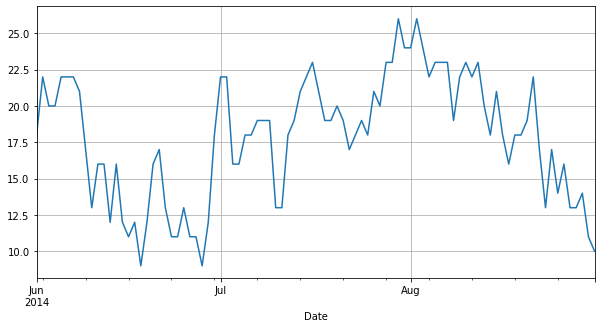

In [10]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

Well looking at the graph from the ending of July and begining of August looks good for mean temperatures over 20 degrees C so let's also put precipitation on the graph too:

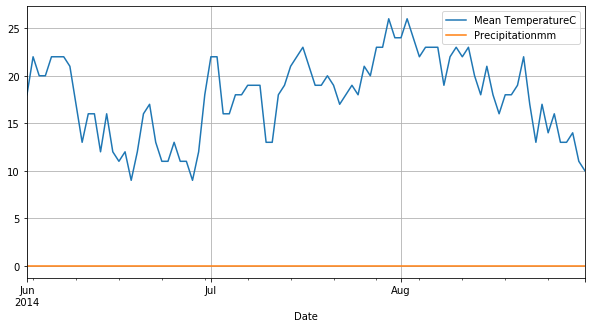

In [11]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

  The ending of July and begining of August is still looking good, with no sign of heavy rain. Let's have a closer look by just plotting mean temperature and precipitation for ending of July and begining of August.  

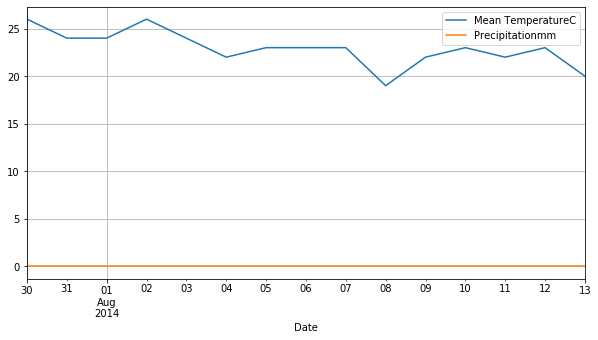

In [12]:
julyAndAugust = summer.loc[datetime(2014,7,30) : datetime(2014,8,13)]
julyAndAugust[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Yes, From the 30th of July to the 12th of August looks pretty good, without any significant rain, the 8th is just the only day when the mean temperature drops below 20 degrees.

## Conclusions

The graphs have shown the volatility of a Moscow summer, but from the 30th of July to the 12th of August the weather wasn't too bad in 2014. Of course this is no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction we would need to analyse the summers for many more years. 